In [9]:
import torch
from torch import nn
import torch.nn.functional as F

In [2]:
c = ConvBlock(3, 64)
out = c(x)
print(out.shape)

torch.Size([1, 64, 256, 256])


In [7]:
x = torch.randn(2, 3, 256, 256)

In [5]:
import torch
from torch import nn
import torch.nn.functional as F
from model.blocks import InvResBlock, ConvNormLRelu

In [42]:
block1 = nn.Sequential(
    ConvNormLRelu(in_channels=3, out_channels=32, kernel_size=7, stride=1),
    ConvNormLRelu(in_channels=32, out_channels=64, kernel_size=3, stride=2)
)
block2 = nn.Sequential(
    ConvNormLRelu(in_channels=64, out_channels=128, kernel_size=3, stride=1),
    ConvNormLRelu(in_channels=128, out_channels=256, kernel_size=3, stride=2),
)
block3 = nn.Sequential(
    InvResBlock(in_channels=256, exp_ratio=2, res_connection=False),
    InvResBlock(in_channels=256, exp_ratio=2, res_connection=True),
    InvResBlock(in_channels=256, exp_ratio=2, res_connection=True),
    InvResBlock(in_channels=256, exp_ratio=2, res_connection=True),
    ConvNormLRelu(in_channels=256, out_channels=128, kernel_size=3, stride=1)
)

block4 = nn.Sequential(
    ConvNormLRelu(in_channels=128, out_channels=128, kernel_size=3, stride=1),
    ConvNormLRelu(in_channels=128, out_channels=128, kernel_size=3, stride=1),
)

block5 = nn.Sequential(
    ConvNormLRelu(in_channels=128, out_channels=64, kernel_size=3, stride=1),
    ConvNormLRelu(in_channels=64, out_channels=64, kernel_size=3, stride=1),
    ConvNormLRelu(in_channels=64, out_channels=32, kernel_size=7, stride=1, padding=3),
    ConvNormLRelu(in_channels=32, out_channels=3, kernel_size=3, stride=1, last=True),
)

In [43]:
out1 = block1(x)
out1.shape

torch.Size([2, 64, 126, 126])

In [44]:
out2 = block2(out1)
out2.shape

torch.Size([2, 256, 63, 63])

In [45]:
out3 = block3(out2)
out3.shape

torch.Size([2, 128, 63, 63])

In [46]:
out4 = F.interpolate(out3, size=(128, 128), mode="bilinear", align_corners=True)
out4 = block4(out4)
out4.shape

torch.Size([2, 128, 128, 128])

In [40]:
out5 = F.interpolate(out4, size=(256, 256), mode="bilinear", align_corners=True)
out5 = block5(out5)
out5.shape

torch.Size([2, 3, 256, 256])

In [47]:
from collections import OrderedDict

In [6]:
from model.discriminator import AnimeGANDiscriminator
from model.generator import AnimeGANv2Generator

gen = AnimeGANv2Generator()
disc = AnimeGANDiscriminator()

In [7]:
gen = AnimeGANv2Generator()
disc = AnimeGANDiscriminator()

In [1]:
from torchsummary import summary

In [12]:
summary(disc, input=torch.randn(8,3,256,256));

Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─ConvLNormLRelu: 2-1               --
|    |    └─Sequential: 3-1              896
|    └─ConvLNormLRelu: 2-2               --
|    |    └─Sequential: 3-2              18,496
|    └─ConvINormLRelu: 2-3               --
|    |    └─Sequential: 3-3              73,856
|    └─ConvLNormLRelu: 2-4               --
|    |    └─Sequential: 3-4              147,584
|    └─ConvLNormLRelu: 2-5               --
|    |    └─Sequential: 3-5              295,168
|    └─ConvLNormLRelu: 2-6               --
|    |    └─Sequential: 3-6              590,080
|    └─Conv2d: 2-7                       2,305
Total params: 1,128,385
Trainable params: 1,128,385
Non-trainable params: 0


In [11]:
summary(gen, input=torch.randn(8,3,256,256));

Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─ConvLNormLRelu: 2-1               --
|    |    └─Sequential: 3-1              4,736
|    └─ConvLNormLRelu: 2-2               --
|    |    └─Sequential: 3-2              18,496
|    └─ConvLNormLRelu: 2-3               --
|    |    └─Sequential: 3-3              73,856
|    └─ConvLNormLRelu: 2-4               --
|    |    └─Sequential: 3-4              295,168
|    └─InvResBlock: 2-5                  --
|    |    └─Sequential: 3-5              268,032
├─Sequential: 1-2                        --
|    └─InvResBlock: 2-6                  --
|    |    └─Sequential: 3-6              268,032
|    └─InvResBlock: 2-7                  --
|    |    └─Sequential: 3-7              268,032
|    └─InvResBlock: 2-8                  --
|    |    └─Sequential: 3-8              268,032
|    └─InvResBlock: 2-9                  --
|    |    └─Sequential: 3-9              268,032
|    └─InvResBlock: 2-10      

In [13]:
from glob import glob

In [18]:
len(glob(pathname="images/Target/*.jpg") + glob(pathname="images/Target/*/*.jpg"))

5754

In [1]:
from torchvision import transforms
from dataset.dataset import AnimeGANDataset, MainDataset

In [2]:
from torch.utils.data import DataLoader, Dataset

In [3]:
TRANSFORMS = transforms.Compose(
    [
        transforms.Resize((256,256)),
        transforms.ToTensor(),
    ]
)

In [4]:
dat = MainDataset(input_dir="images/Input/", target_dir="images/Target/", transform=TRANSFORMS)

In [5]:
loader =  DataLoader(
            dat,
            batch_size=4,
            num_workers=8,
            shuffle=True
        )

In [9]:
a = next(iter(loader))
a[0].shape, a[1].shape, a[2].shape

(torch.Size([4, 3, 256, 256]),
 torch.Size([4, 3, 256, 256]),
 torch.Size([4, 3, 256, 256]))

In [14]:
import os
import cv2
from PIL import Image, ImageFilter

In [23]:
origin = cv2.imread("images/Target/garden_of_words/0b16c592-b4e8-4416-b862-2d61058bed9b{start_frame}.jpg")
edges = createEdgesOverlay(origin)
result = overlayEdges(edges, origin)

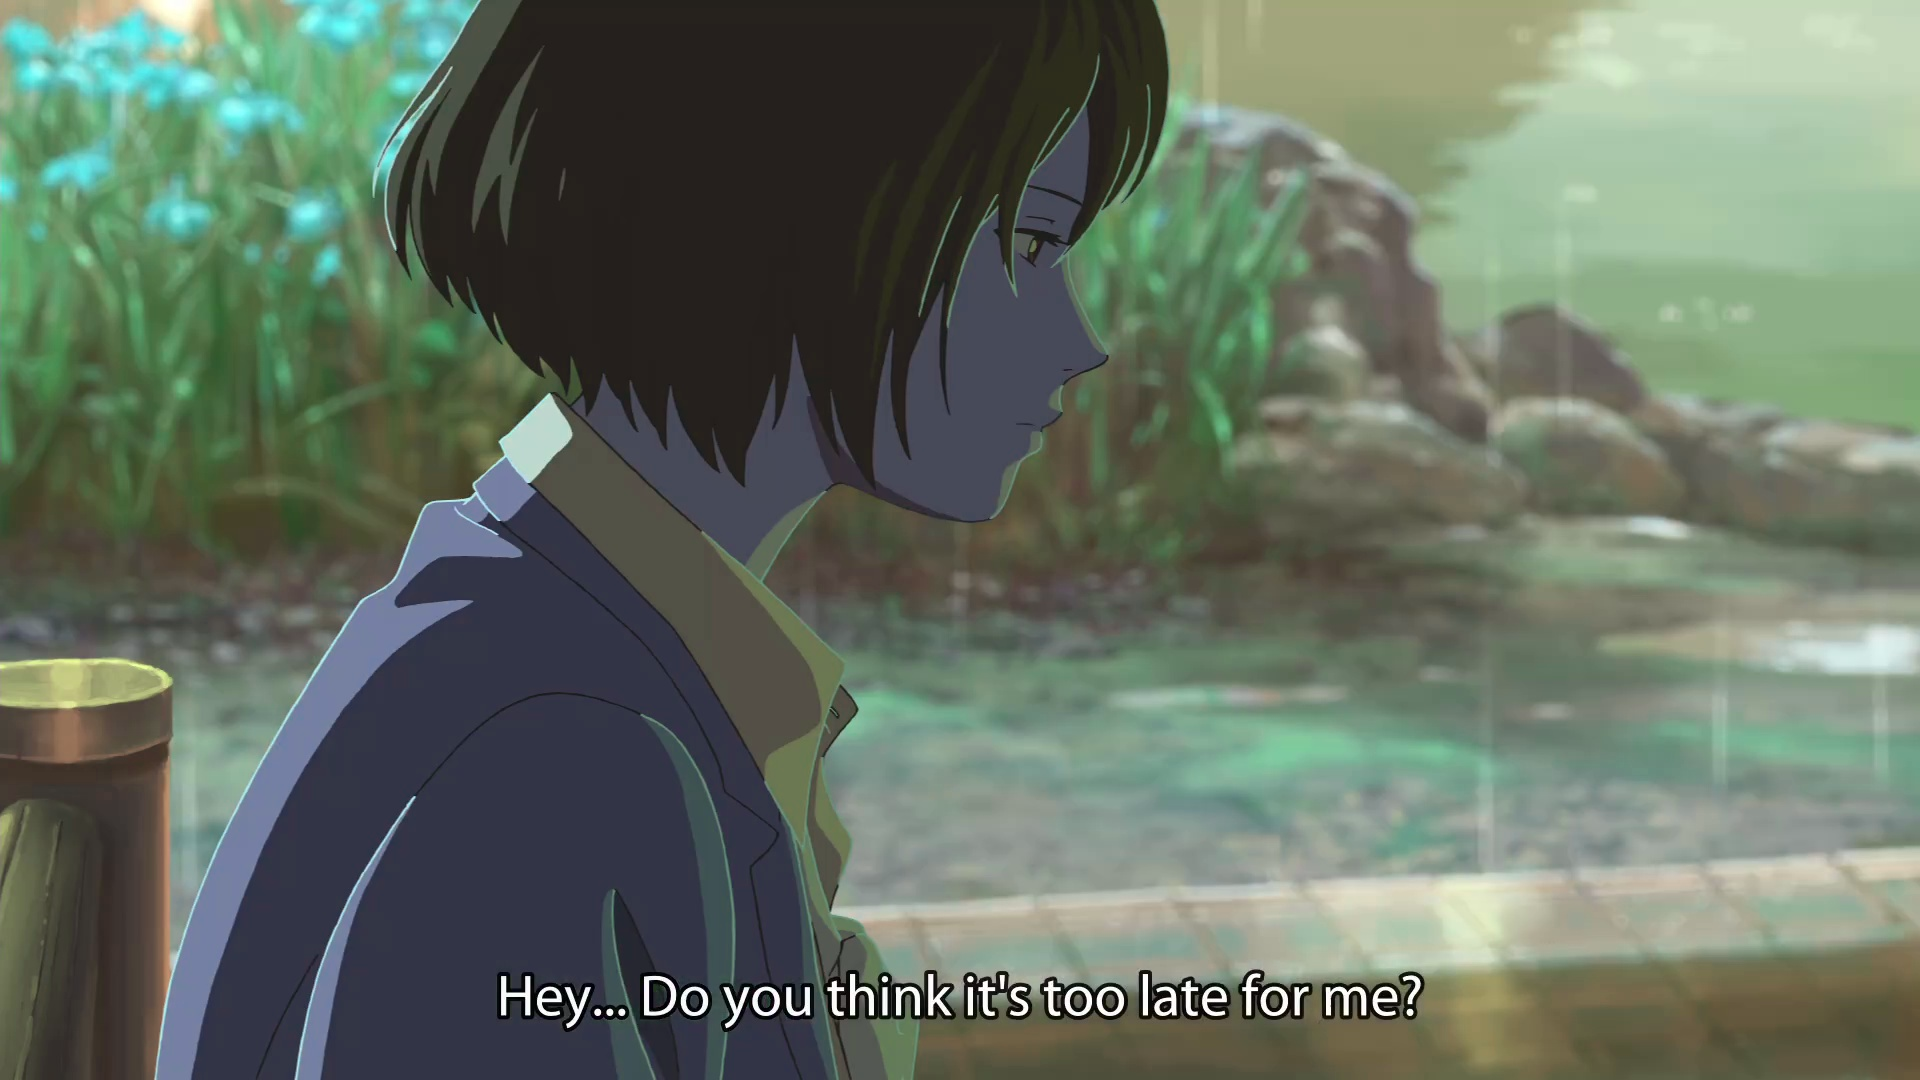

In [26]:
Image.fromarray(origin)

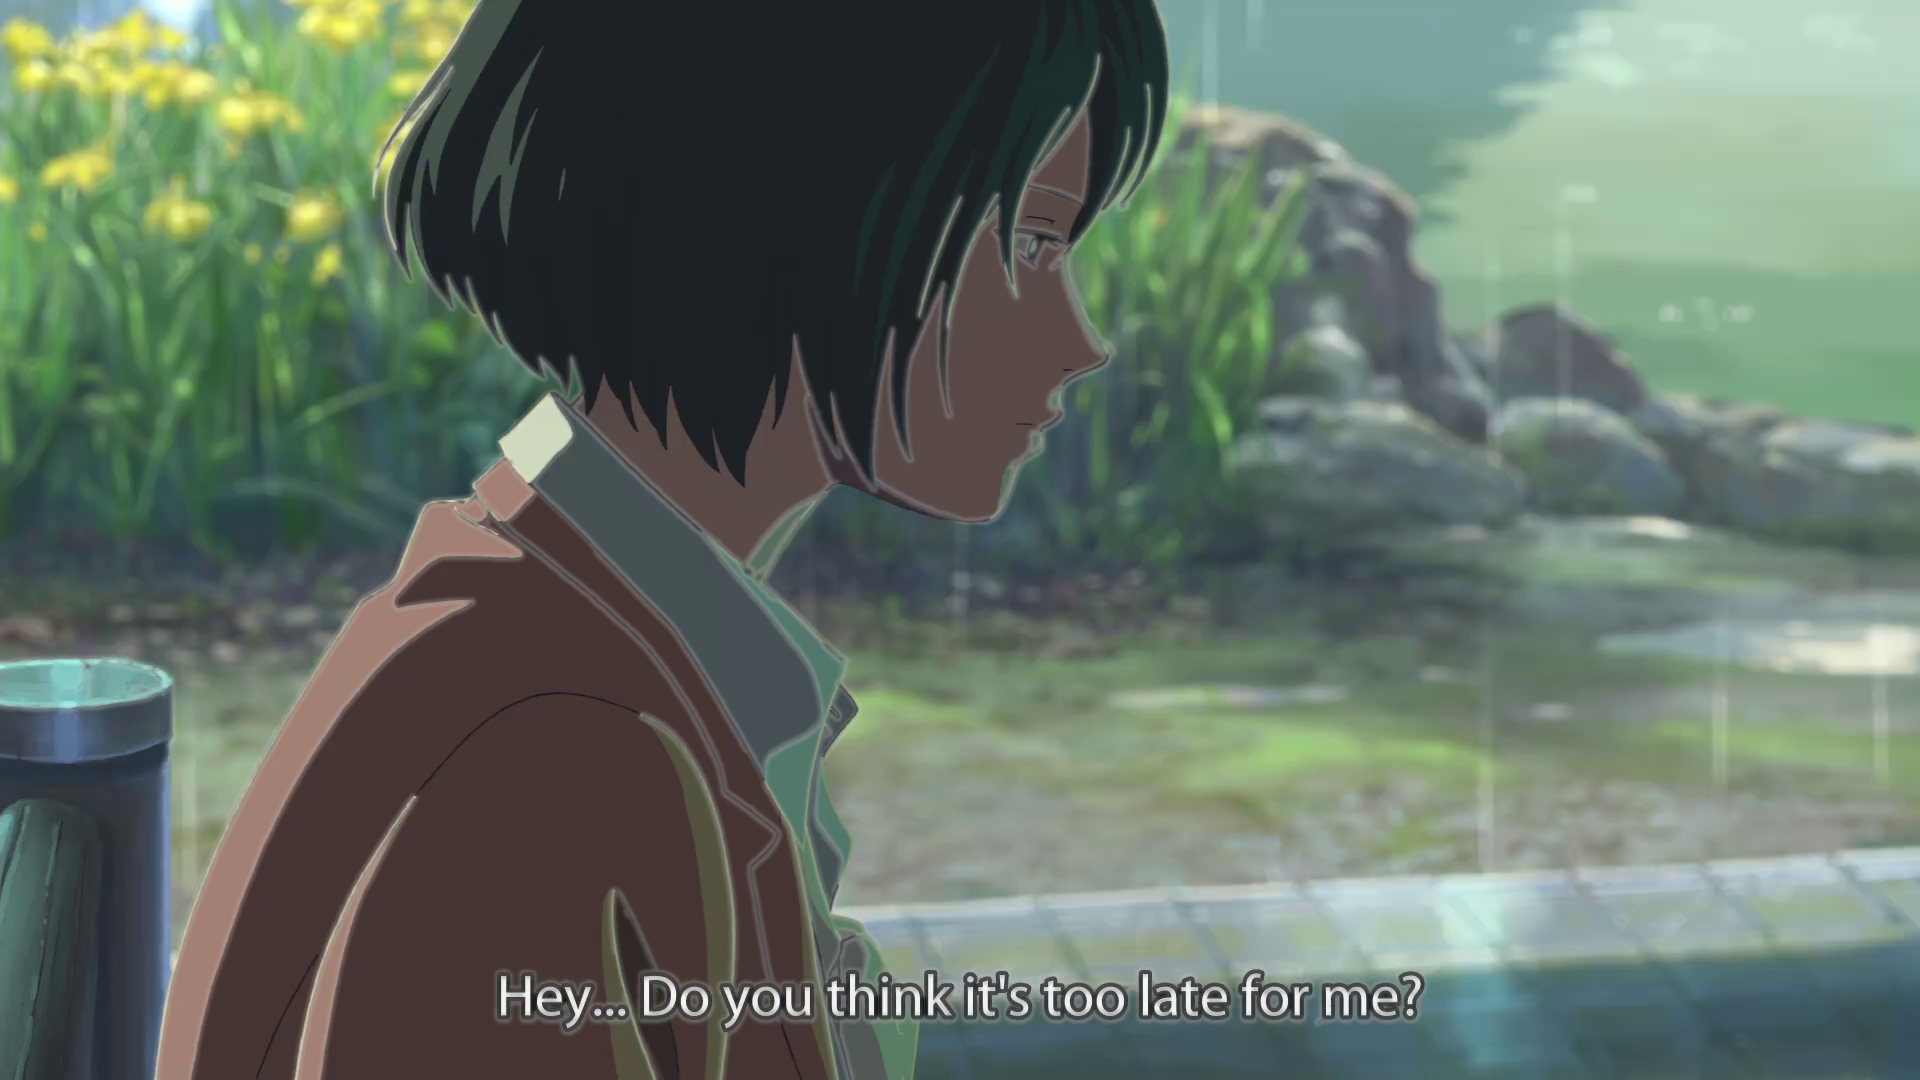

In [24]:
result

In [21]:
def overlayEdges(edges, origin):
    background = transformFromCV2ToPillowImageFormat(origin)
    background.paste(edges, (0, 0), edges)
    background = background.convert("RGB")
    return background

def transformFromCV2ToPillowImageFormat(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGBA)
    return Image.fromarray(img)

def createEdgesOverlay(origin):
    edges = cv2.Canny(origin, 30, 300, 3)
    edges = cv2.dilate(edges, (3, 3))
    edges = cv2.bitwise_not(edges)
    edges = transformFromCV2ToPillowImageFormat(edges)
    makeWhiteBackgroundTransparent(edges)
    edges = edges.filter(ImageFilter.GaussianBlur) #do blurring here because doing it before making background transparent results in white halo

    return edges

def makeWhiteBackgroundTransparent(img):
    datas = img.getdata()
    newData = []
    for item in datas:
        if item[0] == 255 and item[1] == 255 and item[2] == 255:
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item)
    img.putdata(newData)


In [30]:
import torch
def gram_matrix(features):
    # Flatten the feature map into 2D tensor (batch_size, num_channels, height * width)
    batch_size, num_channels, height, width = features.size()
    flattened_features = features.view(batch_size, num_channels, -1)
    
    # Compute the Gram matrix as the dot product of flattened feature map and its transpose
    gram = torch.bmm(flattened_features, flattened_features.transpose(1, 2))
    
    # Normalize the Gram matrix by the number of elements in each feature map
    # gram /= (num_channels * height * width)
    
    return gram

In [46]:
from model.discriminator import AnimeGANDiscriminator
from model.generator import AnimeGANv2Generator

gen = AnimeGANv2Generator()
disc = AnimeGANDiscriminator()
x = torch.randn(4, 3, 256, 256)

gen_out = gen(x)
disc_out = disc(gen_out)

In [49]:
gen_out.shape, disc_out.shape

(torch.Size([4, 3, 256, 256]), torch.Size([4, 1, 64, 64]))

In [67]:
from torch import nn
import torch.nn.functional as F
# criterion = nn.BCELoss()
# criterion = nn.BCEWithLogitsLoss()
criterion = nn.MSELoss()

In [68]:
real_labels = torch.ones_like(disc_out)
fake_labels = torch.zeros_like(disc_out)

In [69]:
real_anime = torch.randn(4, 3, 256, 256)
generated_anime = torch.randn(4, 3, 256, 256)

dic_real_anime = disc(real_anime)
disc_fake_anime = disc(generated_anime)

real_labels = torch.ones_like(real_labels)
fake_labels = torch.zeros_like(fake_labels)

In [76]:
d_loss_real = criterion(dic_real_anime, real_labels)
d_loss_fake = criterion(disc_fake_anime, fake_labels)

d_loss = d_loss_real + d_loss_fake

tensor(0.0163, grad_fn=<MseLossBackward0>)

In [ ]:
outputs_real = discriminator(real_data)
d_loss_real = criterion(outputs_real, real_labels)

In [ ]:
def adv_loss(preds, real):

In [81]:
def img_converter(img_path):
    origin = cv2.imread(img_path)

    edges = cv2.Canny(origin, 30, 300, 3)
    edges = cv2.dilate(edges, (3, 3))
    edges = cv2.bitwise_not(edges)
    edges = transformFromCV2ToPillowImageFormat(edges)
    makeWhiteBackgroundTransparent(edges)
    edges = edges.filter(ImageFilter.GaussianBlur)

    background = transformFromCV2ToPillowImageFormat(origin)
    background.paste(edges, (0, 0), edges)
    background = background.convert("RGB")
    return background

In [82]:
im = img_converter("images/Target/garden_of_words/0b16c592-b4e8-4416-b862-2d61058bed9b{start_frame}.jpg")

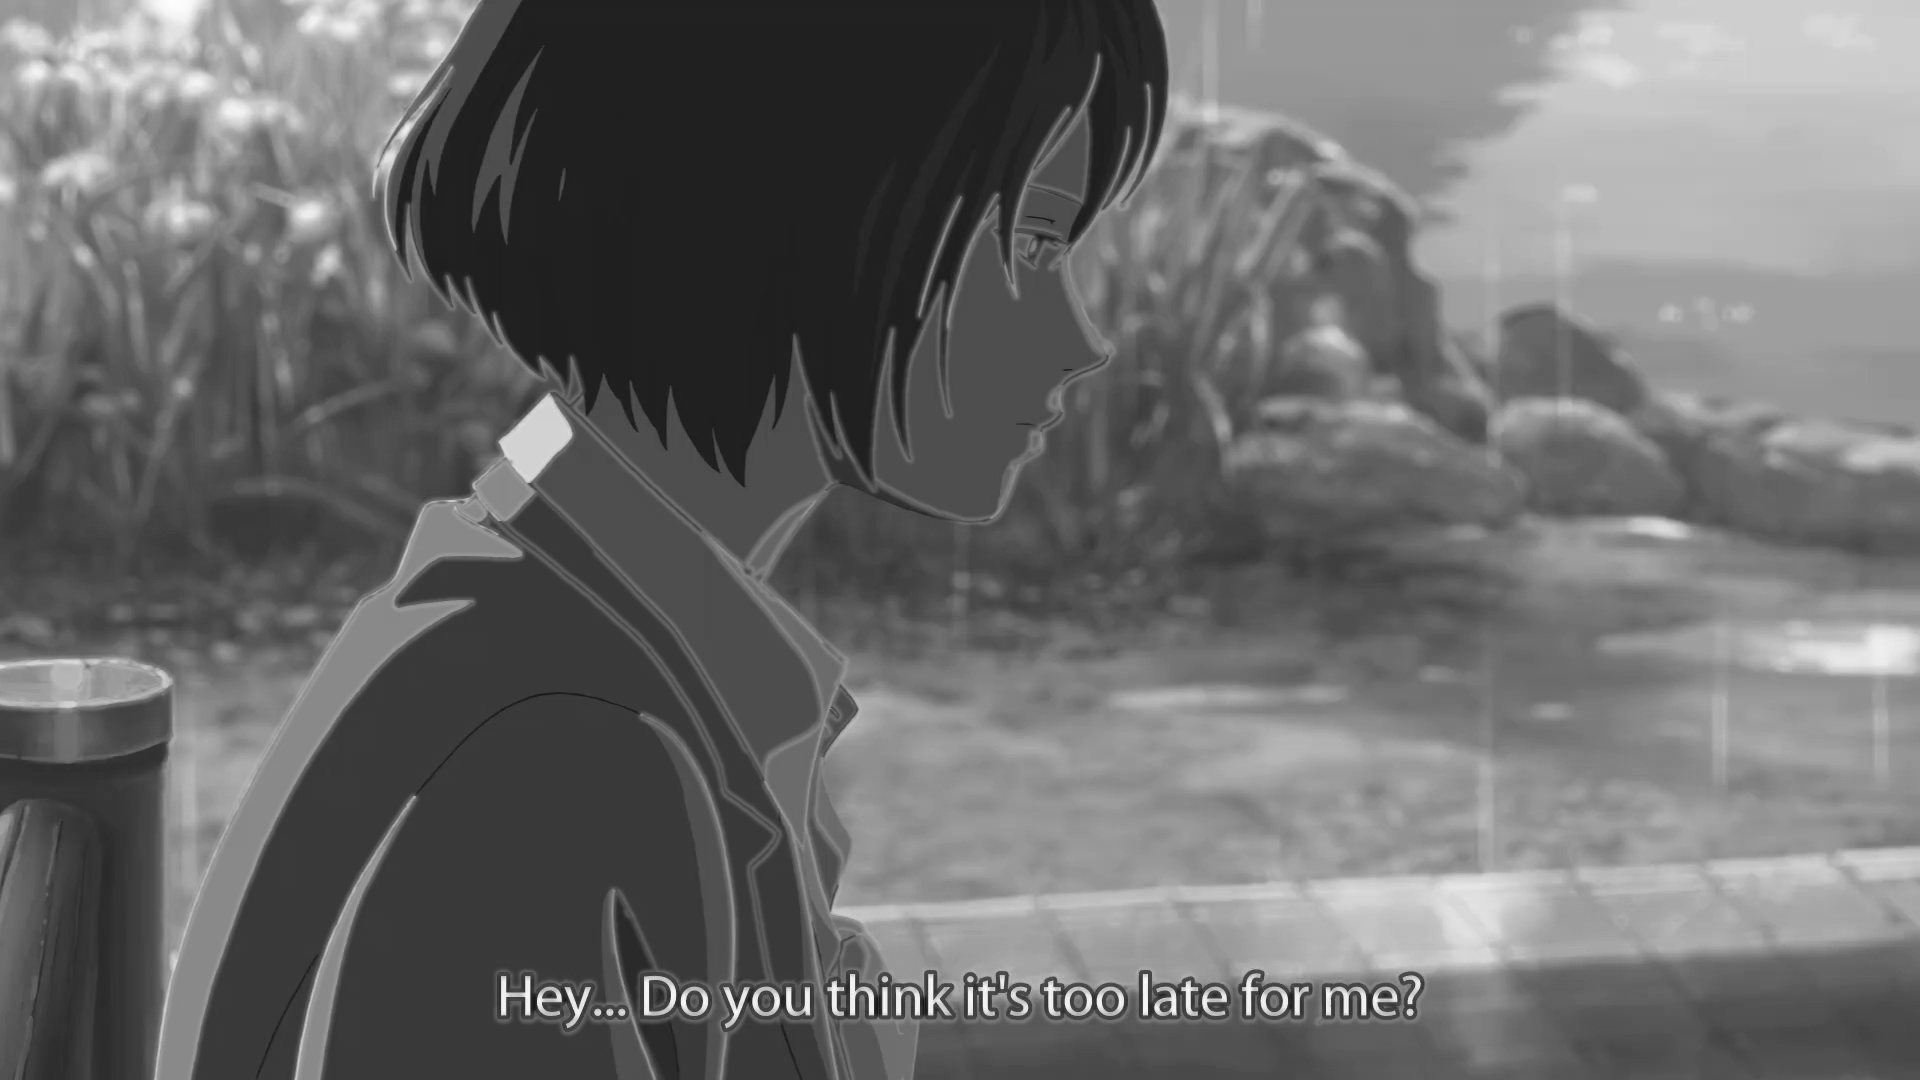

In [43]:
im.convert("L")

In [31]:
a = gram_matrix(torch.randn(16, 3, 256, 256))

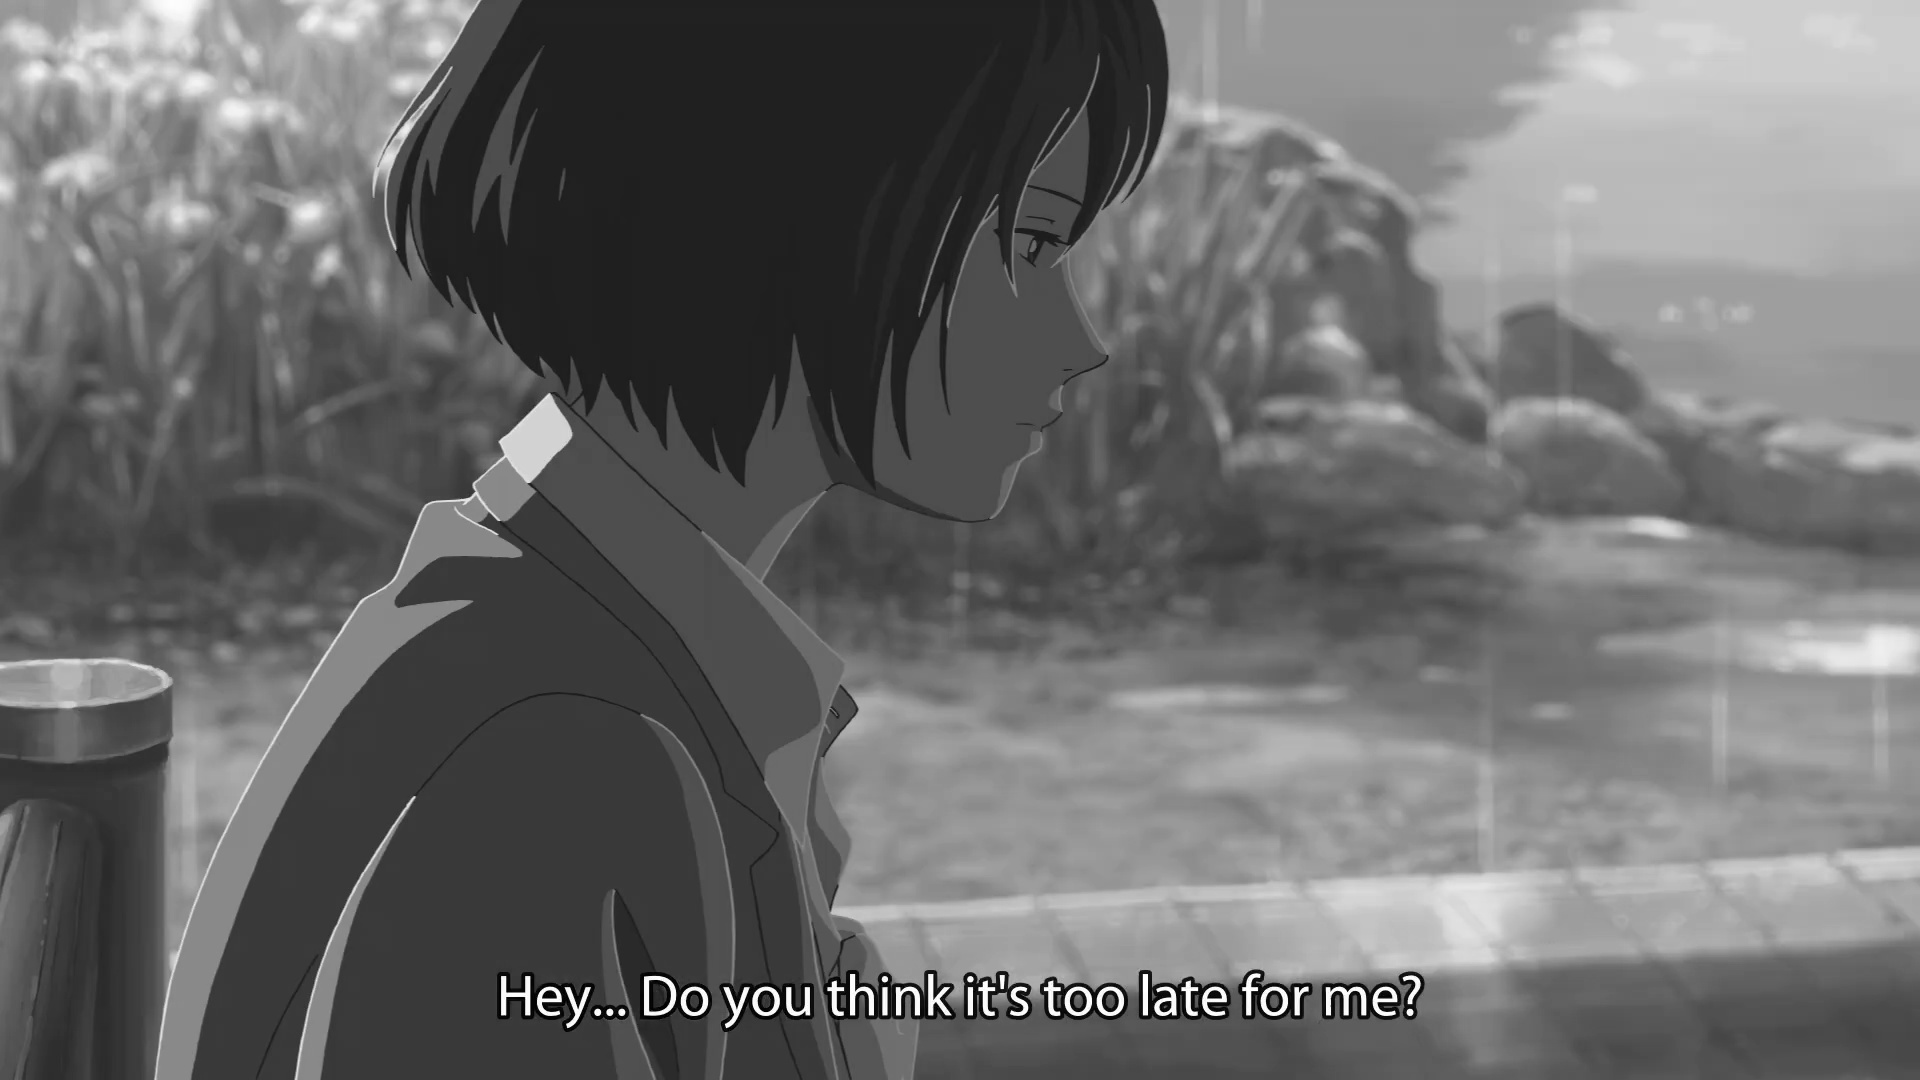

In [37]:
img = Image.open("images/Target/garden_of_words/0b16c592-b4e8-4416-b862-2d61058bed9b{start_frame}.jpg")
img.convert("L")